In [1]:
import numpy as np
import matplotlib.pyplot as mp
from pylab import show
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [2]:
data = np.loadtxt("/Users/wangfei/Documents/Courses/CS/CS412/HW/HW1/data.csv")
np.random.seed(100)
np.random.shuffle(data)
features = []
digits = []
for row in data:
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))
numTrain = int(len(features)*0.2)
trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]

In [3]:
#polynomial kernel with degree 3
kPCA = KernelPCA(n_components=2, kernel='poly', degree = 3)
kPCA_transform = kPCA.fit_transform(trainFeatures)
#trainFeatures_transformed.shape   (312, 2)

## 1 Feature Extraction  
Python package "sklearn" was used. Figure 2.1 shows the two features extracted by Kernel PCA with polynomail kernel with degree 3. 

**a) Compare kernel PCA features with the features you selected from HW1. Do these features seem to better separate the data?**  
Yes. The features extracted by kernel PCA seems to be separating the data better. The features I used for HW1 are mean intensity and intensity standard deviation. Although these two features separate data pretty well, the gap between two groups are pretty narrow. But in this kPCA case, the two groups are widely separated and are thus better (see Figure 2.1). 

**b) Give the explained variance ratio for each of the two feature extractions given above. Is there one of the methods which explains more variance than the other? Is this what you expect? Explain your answer.**  


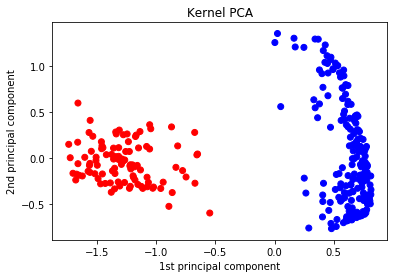

NameError: name 'Xnorm' is not defined

In [4]:
##Figure 2.1
img_path = '/Users/wangfei/Documents/Courses/CS/CS412/HW/HW2/Figures/'
mp.figure()
mp.title("Kernel PCA")
colors = []
for index in range(len(trainFeatures)):
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")
mp.scatter(kPCA_transform[:,0], kPCA_transform[:,1],c=colors)
mp.xlabel("1st principal component")
mp.ylabel("2nd principal component")
mp.savefig(img_path + 'Figure2_1.png', dpi = 300)
show() 
######## kernel PCA #########
explained_variance = np.var(kPCA_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
explained_variance_ratio  #array([0.78807441, 0.21192559])
np.cumsum(explained_variance_ratio)  #array([0.78807441, 1.        ])

var = np.var(trainFeatures,0)
######## kernel PCA variance explained#########
explained_variance[0]/np.sum(var)  # 0.011673124960289095
explained_variance[1]/np.sum(var)  # 0.0031390867465473904 
#sum = 0.014812211706836486


######## 1st HW two features #########
np.var(Xnorm)/np.sum(var)  #0.0017717496326050638
np.var(Ynorm)/np.sum(var)  #0.0024516214368288866
#sum = 0.00422337106943395

## 2 Logistic Regression  
Two features used in HW1 are mean intensity and intensity standard deviation. The parameter C in logistic regression model is the inverse of the strength of the regularization. So the smaller C is, the bigger the model penalize the coefficient to prevent overfitting.  
Comparison of the four models:  
1. The logistic regression model with L2 penalty and C = 0.01 does not seem to have a high prediction accuracy (accuracy = 0.753).  
2. L2 penalty with C = 2 is better for our data set. The accuracy (accuracy = 0.891) is higher.  
3. The model with L1 penalty and C = 0.01 suffers underfitting. Two groups do not separate (accuracy = 0.670).  
4. The model with L1 penalty and C = 2 is performing the best among these four different models (accuracy = 0.952).  
Lasso shrinkage (L1) tends to shrink the less important features' coefficients to zero together.  
In this homework, the feature number is not big and when we penalize too much (C = 0.01 case), we penalize too much and therefore causing underfitting in case 3.  
Case 4 outperforms the other cases.  
To summarize, in our data set using only two features described in HW1, L1 penalty does not cause overfitting. Actually when the feature numbers are small and logistic regression is just a linear separator, the likelihood that such a model suffers overfitting is low. 

In [ ]:
## Use the two features that you created for your 2D graph in HW1 
X = []   ##mean
Y = []   ##std
colors = []
for index in range(len(trainFeatures)):
    X.append(np.mean(trainFeatures[index]))
    Y.append(np.std(trainFeatures[index]))  
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")
##normalization     
def normalize(lists):
    norm = [i * 2/(max(lists)-min(lists))+
            1-2*max(lists)/(max(lists)-min(lists)) for i in lists]
    return norm;
##normalize two features 
Xnorm = normalize(X)
Ynorm = normalize(Y)
Xnorm = np.asarray(Xnorm)
Ynorm = np.asarray(Ynorm)
simpleTrain = np.column_stack((Xnorm,Ynorm))
#logistic regression models 
lr_c1_l2 = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.01).fit(simpleTrain, trainDigits)
lr_c2_l2 = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 2).fit(simpleTrain, trainDigits)
#Extra credit Using L1 penalty
lr_c1_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.01).fit(simpleTrain, trainDigits)
lr_c2_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 2).fit(simpleTrain, trainDigits)

In [ ]:
xPred = []
yPred = []
for xP in range(-100,100):
    xP = xP/100
    for yP in range(-100,100):
        yP = yP/100
        xPred.append(xP)
        yPred.append(yP)

coordinate = list(zip(xPred,yPred))

def pred(model):
    preds = model.predict(coordinate)
    cPred = []
    for i in range(len(coordinate)):
        if(preds[i] == "1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
    return cPred;            

In [ ]:
def accuracy(model):
    preds = model.predict(simpleTrain)
    accuracy = accuracy_score(trainDigits,preds)
    return accuracy;
#accuracy for four models 
[accuracy(lr_c1_l2), accuracy(lr_c2_l2), 
 accuracy(lr_c1_l1), accuracy(lr_c2_l1)]

In [ ]:
#define plot function: for plotting decision boundary figures and CV_error figures 
def plot(grid1,grid2,plotNum,fileName,plotType,model,
         subtitle,ylimL,ylimU,xlab,ylab):   
    fig = mp.figure()
    if(plotNum==1):
        mp.title(fileName)
        if(plotType==1):
            mp.scatter(Xnorm, Ynorm, c=colors, s=3)
            mp.scatter(xPred, yPred, s=3, c=pred(model),alpha=.2)
        elif(plotType==2):
            mp.errorbar(c, model[0], marker='s', yerr=model[1],fmt='o',
                        markersize=2, capsize=1.5, elinewidth=1)
            mp.xscale('log')
        else:
            print('Plot Type not defined.')
        mp.ylim(ylimL,ylimU)
        mp.xlabel(xlab)
        mp.ylabel(ylab)
        mp.savefig(img_path + fileName, dpi = 300)
    else:
        for i in range(1,(plotNum+1)):
            ax = fig.add_subplot(grid1,grid2,i)
            if(plotType==1):
                ax.scatter(Xnorm, Ynorm, c=colors, s=3)
                ax.scatter(xPred, yPred, s=3, c=pred(model[i-1]),alpha=.04)
            elif(plotType==2):
                ax.errorbar(c, model[i-1][0], marker='s', yerr=model[i-1][1],fmt='o',
                        markersize=2, capsize=1.5, elinewidth=1)
                ax.set_xscale('log')
            else:
                print('Plot Type not defined.')
            ax.set_title(subtitle[i-1])
            ax.set_ylim(ylimL,ylimU)
            ax.set_xlabel(xlab)
            ax.set_ylabel(ylab)
            mp.subplots_adjust(top=0.92, bottom=0.12, left=0.11, right=0.94, 
                               hspace=0.60, wspace=0.45)
            mp.savefig(img_path + fileName, dpi = 300)
    return show(); 

In [ ]:
#L2 penalty, C=0.01 Figure 2.2     
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_2.png',plotType=1,model=lr_c1_l2,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')   
#L2 penalty, C=2 Figure 2.3
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_3.png',plotType=1,model=lr_c2_l2,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')
#L1 penalty, C=0.01
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_c1_l1.png',plotType=1,model=lr_c1_l1,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')
#L1 penalty, C=2
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_c2_l1.png',plotType=1,model=lr_c2_l1,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')

## 3 Support Vector Machines


In [ ]:
c = np.logspace(-2,2,num=40,endpoint=True)
def cv_err(kernel, gamma, dim, degree=3):
    err_bar = []
    err_mean = []
    for index in range(40):
        if(kernel=='linear'):
            svc = SVC(kernel = kernel, gamma = gamma, C = c[index])
        elif(kernel=='poly'):
            svc = SVC(kernel = kernel, degree = degree, gamma = gamma, C = c[index])
        elif(kernel=='rbf'):
            svc = SVC(kernel = kernel, gamma = gamma, C =c[index]) 
        else:
            print('Kernel not defined.')
        if(dim==2):
            acc = cross_val_score(svc, simpleTrain, trainDigits, cv=10)
        elif(dim==256):
            acc = cross_val_score(svc, np.asarray(trainFeatures), trainDigits, cv=10)
        else:
            print('Dimension not defined.')
        err = 1 - acc
        err_mean.append(err.mean())
        err_bar.append(1.96 * err.std())
    return [err_mean,err_bar];

In [ ]:
#Figure 2.4 SVM linear 2D CV_error
cv_err_2d_linear = cv_err('linear', 'auto', 2)
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_4.png',plotType=2,
     model=cv_err_2d_linear,subtitle=(''),ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')
#256 space Figure 2.5 
cv_err_256d_linear = cv_err('linear','auto', 256)
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_5.png',plotType=2,
     model=cv_err_256d_linear,subtitle=(''),ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')

In [ ]:
#2D space with optimal C  Figure 2.6
def c_opt(cv):
    upper_bound = np.asarray(cv[0])+np.asarray(cv[1])
    min_upper_bound = np.min(upper_bound)
    indx = np.argmin(upper_bound)
    return c[indx];
c_opt(cv_err_2d_linear)  #30.702906297578497
#SVM with optimal C  linear Figure 2.6
svm_opt = SVC(kernel = 'linear', C = c_opt(cv_err_2d_linear))
svm_opt_fit = svm_opt.fit(simpleTrain, trainDigits)
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_6.png',plotType=1,model=svm_opt_fit,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')   
accuracy(svm_opt_fit)  #0.967948717948718

In [ ]:
#polynomial kernel  2D
cv_err_2d_poly2 = cv_err('poly', 'auto', 2, degree=2)
cv_err_2d_poly5 = cv_err('poly', 'auto', 2, degree=5)
cv_err_2d_poly10 = cv_err('poly', 'auto', 2, degree=10)
cv_err_2d_poly20 = cv_err('poly', 'auto', 2, degree=20)
c_opt_2d_poly_models = (cv_err_2d_poly2,cv_err_2d_poly5,cv_err_2d_poly10,cv_err_2d_poly20)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_7.png',plotType=2,model=c_opt_2d_poly_models,
     subtitle=('Polynomial, degree=2','Polynomial, degree=5',
              'Polynomial, degree=10','Polynomial, degree=20'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')   

In [ ]:
#polynomial kernel  2D
cv_err_2d_poly2 = cv_err('poly', 'auto', 2, degree=2)
cv_err_2d_poly3 = cv_err('poly', 'auto', 2, degree=3)
cv_err_2d_poly4 = cv_err('poly', 'auto', 2, degree=4)
cv_err_2d_poly5 = cv_err('poly', 'auto', 2, degree=5)
c_opt_2d_poly_models = (cv_err_2d_poly2,cv_err_2d_poly3,cv_err_2d_poly4,cv_err_2d_poly5)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_7b.png',plotType=2,model=c_opt_2d_poly_models,
     subtitle=('Polynomial, degree=2','Polynomial, degree=3',
              'Polynomial, degree=4','Polynomial, degree=5'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')   

In [ ]:
c_opt_2d_poly2 = c_opt(cv_err_2d_poly2) 
c_opt_2d_poly5 = c_opt(cv_err_2d_poly5)
c_opt_2d_poly10 = c_opt(cv_err_2d_poly10)
c_opt_2d_poly20 = c_opt(cv_err_2d_poly20)
c_opt_2d_poly2, c_opt_2d_poly5, c_opt_2d_poly10, c_opt_2d_poly20  
#(38.88155180308085, 100.0, 0.01, 0.01)

def opt_model(kernel, C, gamma, degree=3):
    opt_model = SVC(kernel=kernel,degree=degree,C=C,gamma=gamma)
    opt_model = opt_model.fit(simpleTrain,trainDigits)
    return opt_model;

svm_opt_2d_poly2 = opt_model('poly',c_opt_2d_poly2,'auto',degree=2)
svm_opt_2d_poly5 = opt_model('poly',c_opt_2d_poly5,'auto',degree=5)
svm_opt_2d_poly10 = opt_model('poly',c_opt_2d_poly10,'auto',degree=10)
svm_opt_2d_poly20 = opt_model('poly',c_opt_2d_poly20,'auto',degree=20)
#decision boundary for various polynomial degrees at their optimal C's 
svm_opt_2d_poly_models = (svm_opt_2d_poly2,svm_opt_2d_poly5,svm_opt_2d_poly10,svm_opt_2d_poly20)
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_8.png',plotType=1,model=svm_opt_2d_poly_models,
     subtitle=('Polynomial, degree=2','Polynomial, degree=5',
              'Polynomial, degree=10','Polynomial, degree=20'),
     ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 

In [ ]:
def min_upper(degree):
    upper_bound_degree = np.asarray(degree[0])+np.asarray(degree[1])
    min_upper = np.min(upper_bound_degree)
    return min_upper;
[min_upper(cv_err_2d_poly2), min_upper(cv_err_2d_poly5), 
 min_upper(cv_err_2d_poly10), min_upper(cv_err_2d_poly20)] 
#degree 2 and c=c_opt_2d_poly2 optimizes the 2D polynomial model. Save as Figure 2.9
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_9.png',plotType=1,model=svm_opt_2d_poly2,
     subtitle=(''),ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 

In [ ]:
#kernel=‘rbf’
##gamma=0.01, 1, 10 and 100
svm_2d_rbf_gamma_models = [cv_err('rbf',0.01,2),cv_err('rbf',1,2),cv_err('rbf',10,2),cv_err('rbf',100,2)]
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_10.png',plotType=2,
     model=svm_2d_rbf_gamma_models,
     subtitle=('Radial, gamma=0.01','Radial, gamma=1','Radial, gamma=10','Radial, gamma=100'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')

## extra 

In [ ]:
#kernel=‘rbf’
##gamma=0.01, 20, 100 and 1000
svm_2d_rbf_gamma_models = [cv_err('rbf',0.01,2),cv_err('rbf',20,2),cv_err('rbf',100,2),cv_err('rbf',1000,2)]
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_extra.png',plotType=2,
     model=svm_2d_rbf_gamma_models,
     subtitle=('Radial, gamma=0.01','Radial, gamma=20','Radial, gamma=100','Radial, gamma=1000'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')

In [ ]:
#kernel='poly', gamma=0.01, 1, 10 and 100, degree=2 
svm_2d_poly2_gamma_models = [cv_err('poly',0.01,2,degree=2),cv_err('poly',1,2,degree=2),
            cv_err('poly',10,2,degree=2),cv_err('poly',100,2,degree=2)]
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_11.png',plotType=2,
     model=svm_2d_poly2_gamma_models,
     subtitle=('Polynomial(k=2), gamma=0.01','Polynomial(k=2), gamma=1',
               'Polynomial(k=2), gamma=10','Polynomial(k=2), gamma=100'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')

In [ ]:
#kernel='poly', gamma=0.01, 1, 10 and 100, degree=5 
svm_2d_poly5_gamma_models = [cv_err('poly',0.01,2,degree=5),cv_err('poly',1,2,degree=5),
            cv_err('poly',10,2,degree=5),cv_err('poly',100,2,degree=5)]
plot(grid1=2,grid2=2,plotNum=4,fileName='Figure2_12.png',plotType=2,
     model=svm_2d_poly5_gamma_models,
     subtitle=('Polynomial(k=5), gamma=0.01','Polynomial(k=5), gamma=1',
               'Polynomial(k=5), gamma=10','Polynomial(k=5), gamma=100'),
     ylimL=-0.1,ylimU=0.4,xlab='C',ylab='CV_Error')

In [ ]:
#gamma=10, radial 

c_opt_2d_rad_g10 = c_opt(cv_err('rbf',10,2))
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_14.png',plotType=1,
     model= opt_model('rbf',c_opt_2d_rad_g10,10) ,
     subtitle=('Radial, gamma=10'),
     ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 


In [ ]:
#gamma = 1, radial
c_opt_2d_rad_g1 = c_opt(cv_err('rbf',1,2))
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_15.png',plotType=1,
     model= opt_model('rbf',c_opt_2d_rad_g1,1) ,
     subtitle=('Radial, gamma=1'),
     ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD') 